<div style="background-color: #c3e8fb; padding: 10px; color: #144d84;">
<b>Question 3) FashionMNIST Classification CNN</b><br>
In continuation of previous questions, write a convolutional classifier for the Fashion MNIST dataset. This dataset might cause issues on your computer due to sanctions, so you can open it in Colab.  
Ensure the accuracy is not below 90%.
Plot the confusion matrix for your best or final model.

</div>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255.0

num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [8]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(train_images, train_labels, epochs=30, batch_size=128, validation_data=(test_images, test_labels))

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.6073 - loss: 1.0597 - val_accuracy: 0.8198 - val_loss: 0.4927
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8248 - loss: 0.4861 - val_accuracy: 0.8471 - val_loss: 0.4208
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8515 - loss: 0.4048 - val_accuracy: 0.8637 - val_loss: 0.3714
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8693 - loss: 0.3599 - val_accuracy: 0.8706 - val_loss: 0.3462
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8804 - loss: 0.3280 - val_accuracy: 0.8742 - val_loss: 0.3458
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8859 - loss: 0.3092 - val_accuracy: 0.8801 - val_loss: 0.3208
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8968 - loss: 0.2826 - val_accuracy: 0.8855 - val_loss: 0.3035
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9009 - loss: 0.2675 - val_accuracy: 

In [12]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9007 - loss: 0.4939
Test accuracy: 90.34%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


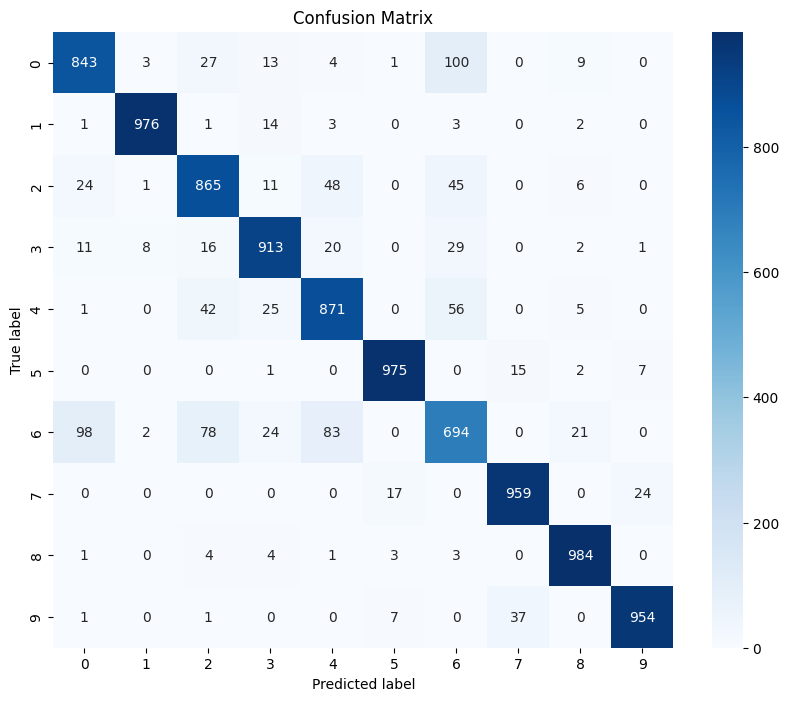

In [13]:
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)

conf_matrix = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(num_classes), yticklabels=np.arange(num_classes))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

___

<div style="background-color: #c3e8fb; padding: 10px; color: #144d84;">
<b>Question 4) Adding BatchNormalization layers</b><br>
In the previous question, add batch normalization layers and compare the accuracy. Please use accuracy and confusion matrix comparison metrics for the comparison.
</div>

In [14]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(train_images, train_labels, epochs=30, batch_size=128, validation_data=(test_images, test_labels))

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.7351 - loss: 0.7702 - val_accuracy: 0.7065 - val_loss: 0.8022
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8636 - loss: 0.3755 - val_accuracy: 0.8516 - val_loss: 0.3927
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8847 - loss: 0.3174 - val_accuracy: 0.8533 - val_loss: 0.4060
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8974 - loss: 0.2776 - val_accuracy: 0.8705 - val_loss: 0.3624
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9071 - loss: 0.2526 - val_accuracy: 0.8837 - val_loss: 0.3271
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9146 - loss: 0.2308 - val_accuracy: 0.8946 - val_loss: 0.2981
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9220 - loss: 0.2097 - val_accuracy: 0.8964 - val_loss: 0.2996
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9261 - loss: 0.1987 - val_accuracy: 0

In [17]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8974 - loss: 0.5377
Test accuracy: 89.85%


The accuracy did not increase ...   
might be as a result of Dropout rate (must decrease it)   
also must decrease learning rate  

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


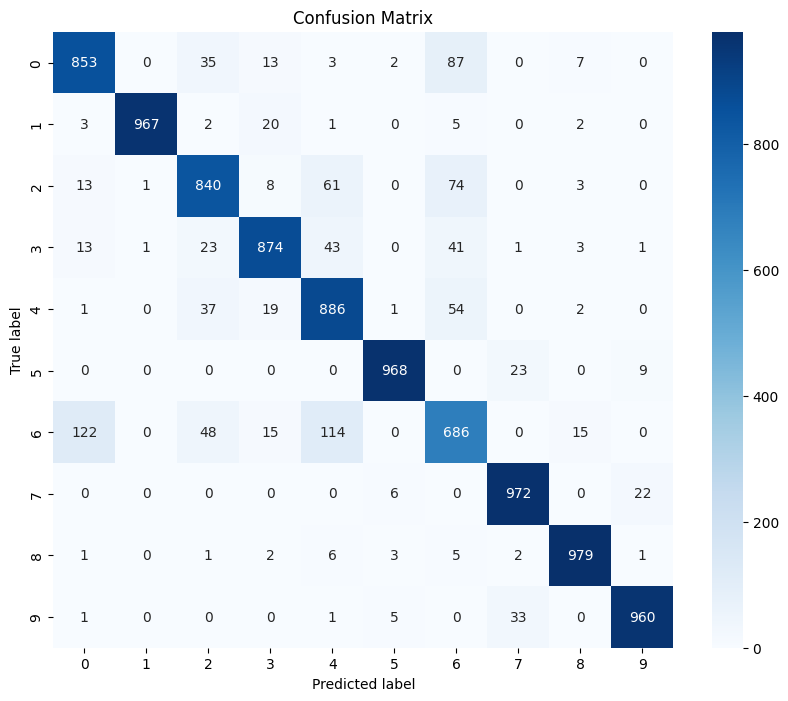

In [18]:
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)

conf_matrix = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(num_classes), yticklabels=np.arange(num_classes))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()